In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as war
from IPython.display import display

In [2]:
from ucimlrepo import fetch_ucirepo 
from sklearn.datasets import load_wine

wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=["target"])

In [3]:
y.value_counts() ## number of data of each catagory

target
1         71
0         59
2         48
Name: count, dtype: int64

In [4]:
X.duplicated().sum()  ## duplicated row 

0

In [5]:
df = pd.concat([X,y],axis=1)

In [6]:
display(df)
df = df.rename(columns={"target": "class"})

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
print(df.shape)

(178, 14)


In [8]:
from scipy import stats

z_scores = np.abs(stats.zscore(df.drop("class", axis=1)))

df_no_outliers = df[(z_scores < 3).all(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers (Z-score):", df_no_outliers.shape)


Original shape: (178, 14)
After removing outliers (Z-score): (168, 14)


In [9]:
X = df_no_outliers.drop("class",axis=1)
y = df_no_outliers["class"]

#### Heatmap

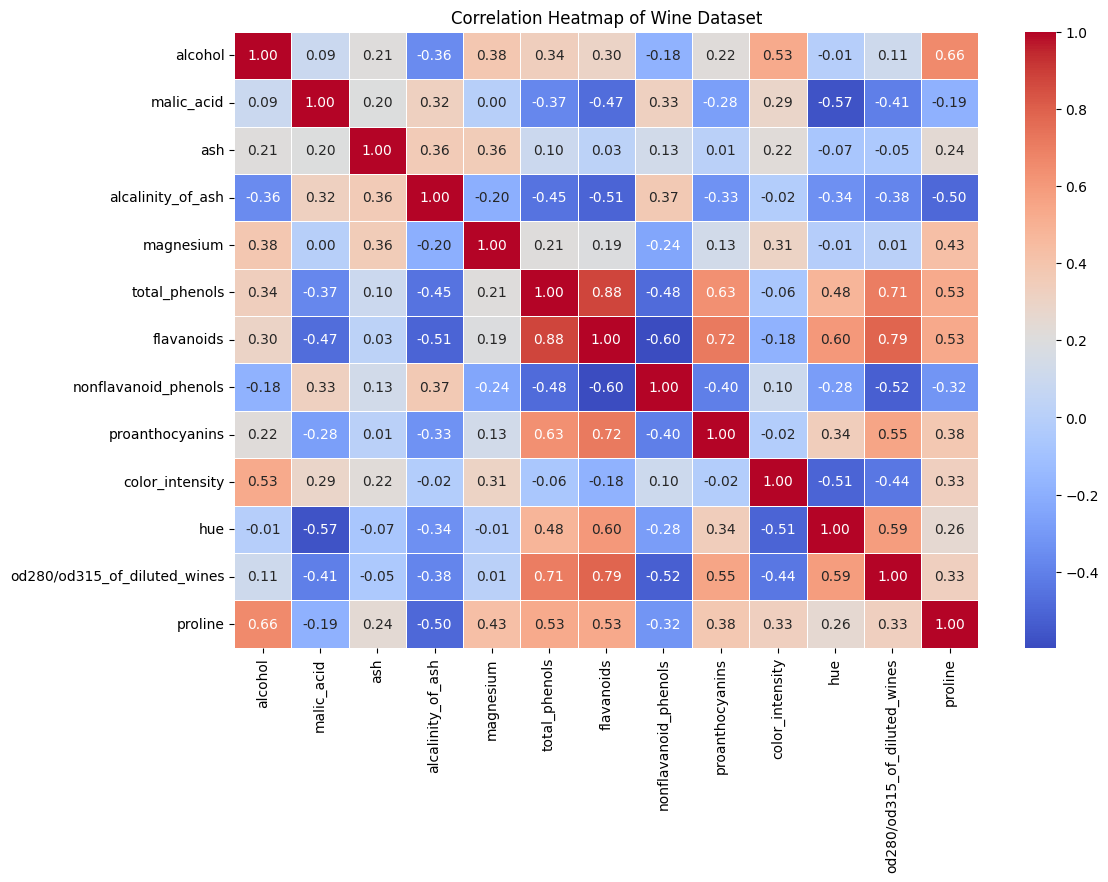

In [10]:
corr = X.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sb.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Wine Dataset")
plt.show()


#### Testing model accuracy at different splits

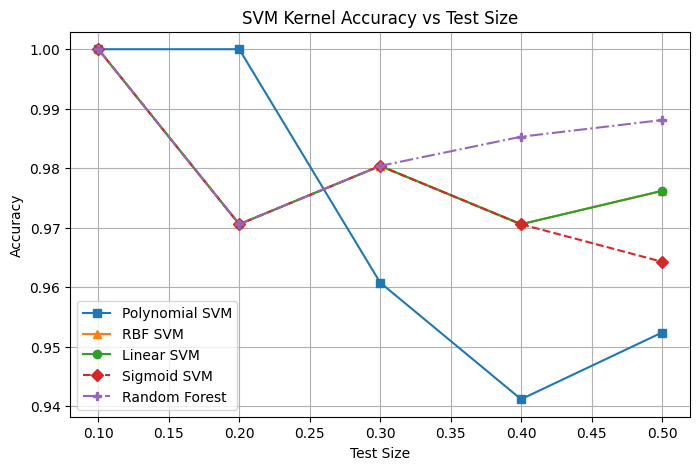

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def test_svm_models_accuracy(X, y):
    test_sizes = np.linspace(0.1, 0.5, 5)
    
    # Store accuracies for each kernel
    linear_acc = []
    poly_acc = []
    rbf_acc = []
    sigmoid_acc = []
    random_forest_acc = []
    
    for t in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=t, shuffle=True, random_state=10, stratify=y
        )
        
        # Scaling (important for SVM)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Linear SVM
        svm_linear = SVC(kernel="linear", C=1)
        svm_linear.fit(X_train, y_train)
        y_pred_l = svm_linear.predict(X_test)
        linear_acc.append(accuracy_score(y_test, y_pred_l))
        
        # Polynomial SVM
        svm_poly = SVC(kernel="poly", degree=3, C=1, gamma="scale")
        svm_poly.fit(X_train, y_train)
        y_pred_p = svm_poly.predict(X_test)
        poly_acc.append(accuracy_score(y_test, y_pred_p))
        
        # RBF (Gaussian) SVM
        svm_rbf = SVC(kernel="rbf", C=1, gamma="scale")
        svm_rbf.fit(X_train, y_train)
        y_pred_r = svm_rbf.predict(X_test)
        rbf_acc.append(accuracy_score(y_test, y_pred_r))
        
        # Sigmoid SVM
        svm_sigmoid = SVC(kernel="sigmoid", C=1, gamma="scale")
        svm_sigmoid.fit(X_train, y_train)
        y_pred_s = svm_sigmoid.predict(X_test)
        sigmoid_acc.append(accuracy_score(y_test, y_pred_s))

        #RandomForest

        forest = RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=4)
        forest.fit(X_train,y_train)
        y_pred_t = forest.predict(X_test)
        random_forest_acc.append(accuracy_score(y_test, y_pred_t))

    
    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(test_sizes, poly_acc, marker='s', label='Polynomial SVM')
    plt.plot(test_sizes, rbf_acc, marker='^', label='RBF SVM')
    plt.plot(test_sizes, linear_acc, marker='o', linestyle='-', label='Linear SVM')
    plt.plot(test_sizes, sigmoid_acc, marker='D', linestyle='--', label='Sigmoid SVM')
    plt.plot(test_sizes,random_forest_acc, marker='P',linestyle='-.', label='Random Forest')
    plt.xlabel("Test Size")
    plt.ylabel("Accuracy")
    plt.title("SVM Kernel Accuracy vs Test Size")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
test_svm_models_accuracy(X, y)


#### From the graph we can see that the models(without any tuning) are performaing best at 90% train and 10% percent test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=10, stratify=y
)

In [13]:
print(X_train.shape)

(151, 13)


In [14]:
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# SVM

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 


def svm_train():
    models = ["linear", "poly", "rbf", "sigmoid"]

    for model_name in models: # Renamed 'model' to 'model_name' to avoid confusion with the module
        print(f"\n{'=' * 20} Model: {model_name.upper()} {'=' * 20}\n")

        svc = SVC(random_state=10, kernel=model_name)
        svc.fit(X_train, y_train)

        y_pred = svc.predict(X_test)

        
        print(" CONFUSION MATRIX ".center(80, "="))
        fig, ax = plt.subplots(figsize=(6, 6))
        disp = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
        # disp.plot() 
        plt.title(f'Confusion Matrix for {model_name.capitalize()} Kernel') 
        plt.show() 
        print("=" * 80)

        
        print(" CLASSIFICATION REPORT ".center(80, "="))
        print(classification_report(y_test, y_pred))
        print("=" * 80)

        
        print(" ACCURACY SCORE ".center(80, "="))
        print(f"{accuracy_score(y_test, y_pred)}")
        print("=" * 80)


==================== Model: LINEAR ====================

=============================== CONFUSION MATRIX ===============================


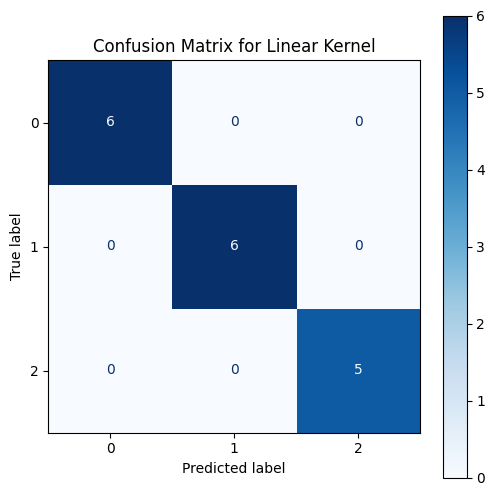

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0

==================== Model: POLY ====================

=============================== CONFUSION MATRIX ===============================


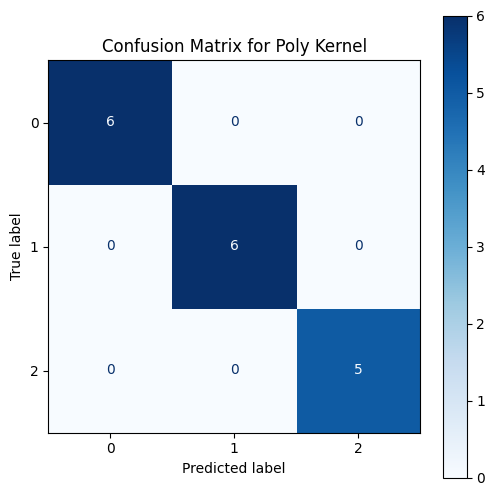

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0

==================== Model: RBF ====================

=============================== CONFUSION MATRIX ===============================


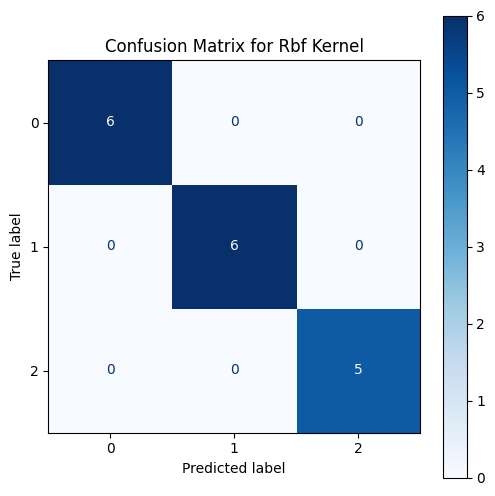

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0

==================== Model: SIGMOID ====================

=============================== CONFUSION MATRIX ===============================


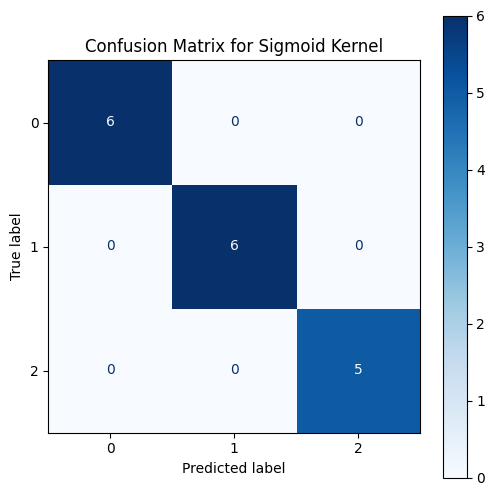

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0


In [16]:
svm_train()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def plot_roc_curve(clf, X_train, X_test, y_train, y_test, clf_name="Classifier"):
    """Handles both binary and multiclass ROC plotting."""
    clf.fit(X_train, y_train)

    # Get decision function or probabilities
    if hasattr(clf, "predict_proba"):
        y_scores = clf.predict_proba(X_test)
    else:
        y_scores = clf.decision_function(X_test)

    n_classes = len(np.unique(y_test))

    # ✅ Binary classification
    if n_classes == 2:
        if y_scores.ndim > 1:  
            y_scores = y_scores[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"{clf_name} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {clf_name}")
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

    # ✅ Multiclass classification
    else:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        
        plt.figure(figsize=(7, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {clf_name} (Multi-class)")
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

#### Fine tuning

In [19]:



def svm_train_tuned():
    models = {
        "linear": {"C": [0.1, 1, 10, 100]},
        "poly": {"C": [0.1, 1, 10], "degree": [2, 3, 4], "gamma": ["scale", "auto"]},
        "rbf": {"C": [0.1, 1, 10, 100], "gamma": ["scale", "auto", 0.01, 0.1, 1]},
        "sigmoid": {"C": [0.1, 1, 10], "gamma": ["scale", "auto"]}
    }

    for model_name, param_grid in models.items():
        print(f"\n{'=' * 20} Model: {model_name.upper()} {'=' * 20}\n")

        svc = SVC(kernel=model_name, random_state=10, probability=True)  # ✅ probability=True ensures predict_proba
        grid = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        print(f"Best Parameters: {grid.best_params_}\n")

        # Confusion Matrix
        print(" CONFUSION MATRIX ".center(80, "="))
        fig, ax = plt.subplots(figsize=(6, 6))
        ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name.capitalize()} Kernel (Tuned)')
        plt.show()
        print("=" * 80)

        # Classification Report
        print(" CLASSIFICATION REPORT ".center(80, "="))
        print(classification_report(y_test, y_pred))
        print("=" * 80)

        # Accuracy
        print(" ACCURACY SCORE ".center(80, "="))
        print(f"{accuracy_score(y_test, y_pred)}")
        print("=" * 80)

        # ✅ ROC Curve (works for both binary & multiclass)
        plot_roc_curve(best_model, X_train, X_test, y_train, y_test, clf_name=model_name.capitalize())



==================== Model: LINEAR ====================

Best Parameters: {'C': 0.1}

=============================== CONFUSION MATRIX ===============================


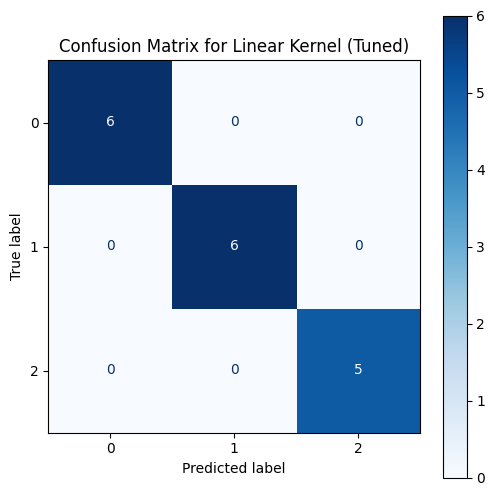

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0


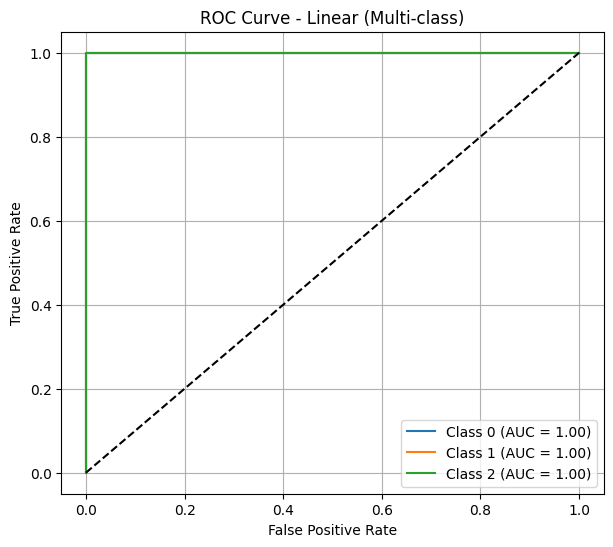


==================== Model: POLY ====================

Best Parameters: {'C': 1, 'degree': 3, 'gamma': 'scale'}

=============================== CONFUSION MATRIX ===============================


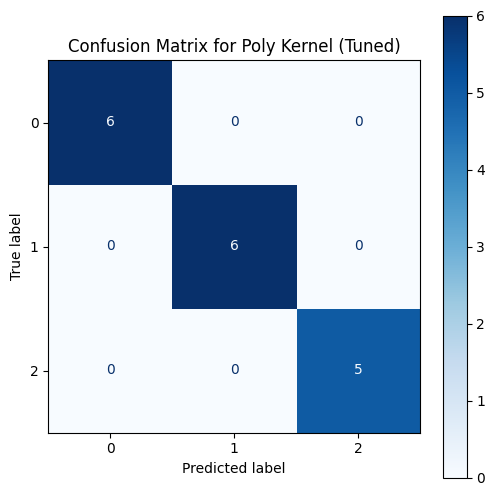

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0


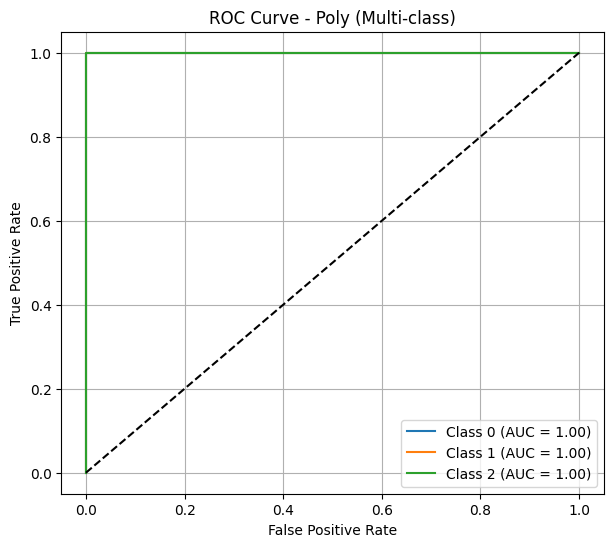


==================== Model: RBF ====================

Best Parameters: {'C': 1, 'gamma': 0.01}

=============================== CONFUSION MATRIX ===============================


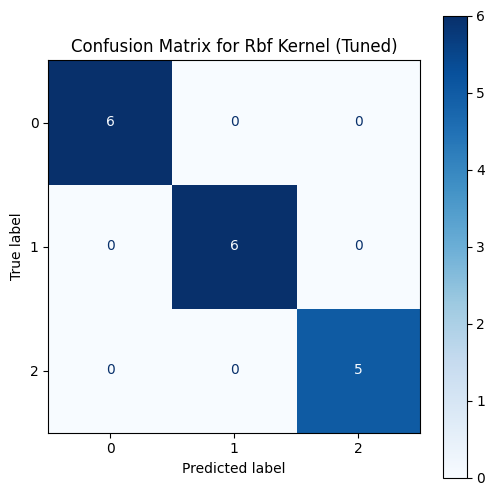

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0


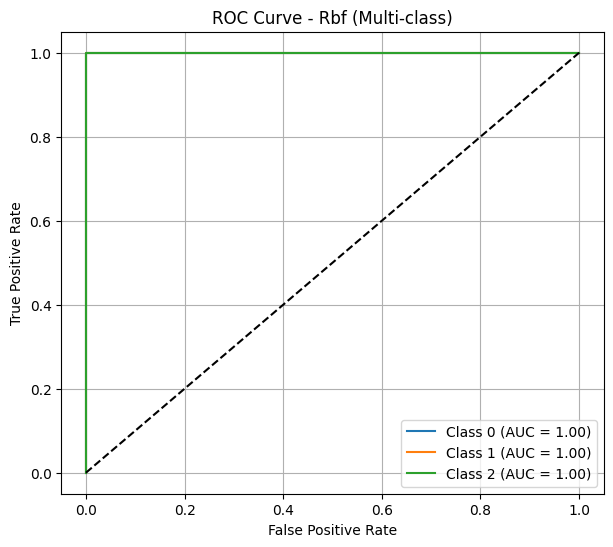


==================== Model: SIGMOID ====================

Best Parameters: {'C': 0.1, 'gamma': 'scale'}

=============================== CONFUSION MATRIX ===============================


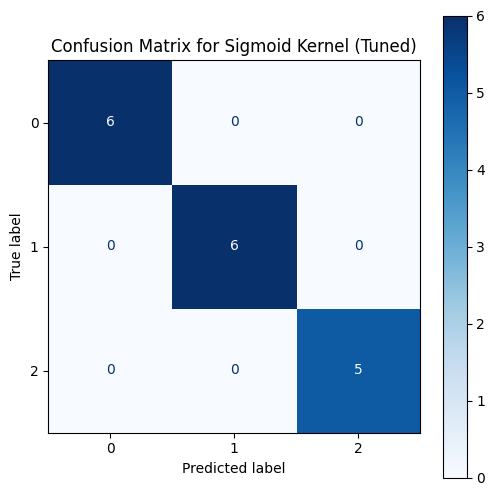

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0


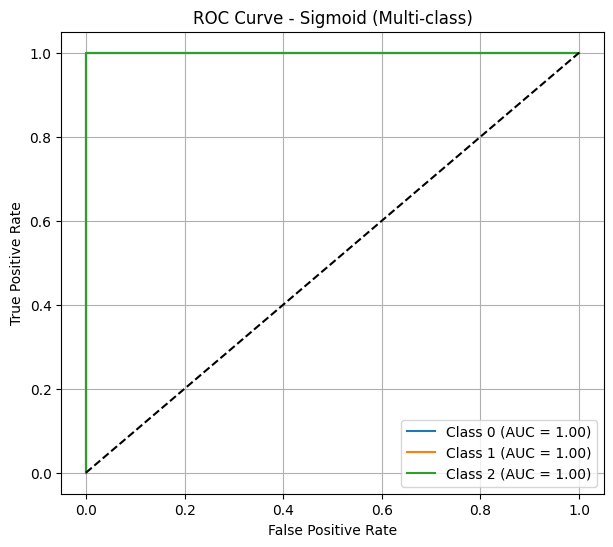

In [20]:
svm_train_tuned()

## Random Forest

=============================== CONFUSION MATRIX ===============================


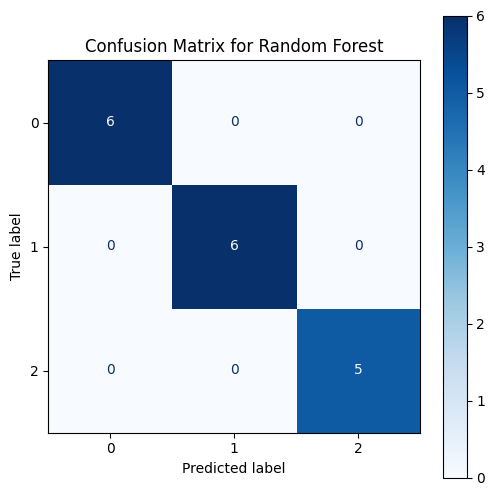

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0


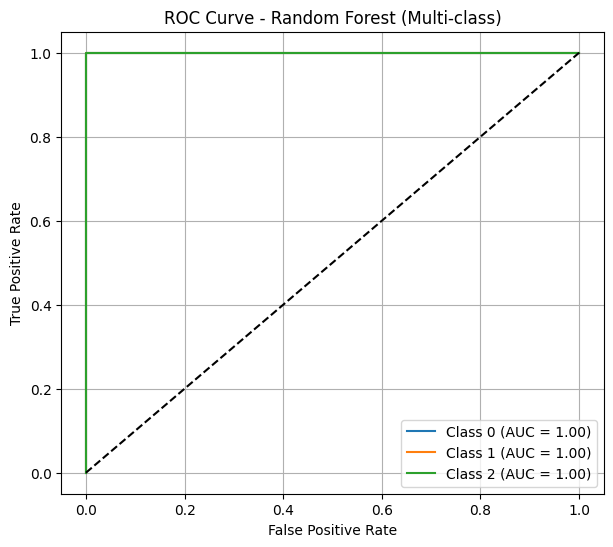

In [21]:
# Simple Random Forest Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(" CONFUSION MATRIX ".center(80, "="))
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()
print("=" * 80)

print(" CLASSIFICATION REPORT ".center(80, "="))
print(classification_report(y_test, y_pred))
print("=" * 80)

print(" ACCURACY SCORE ".center(80, "="))
print(f"{accuracy_score(y_test, y_pred)}")
print("=" * 80)

plot_roc_curve(rf, X_train, X_test, y_train, y_test, clf_name="Random Forest")

#### as already the accuracy is 1 so finetuning is not required

## MLP


=============================== CONFUSION MATRIX ===============================


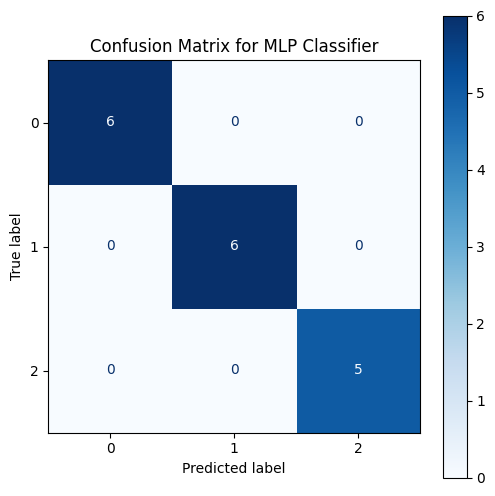

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

================================ ACCURACY SCORE ================================
1.0


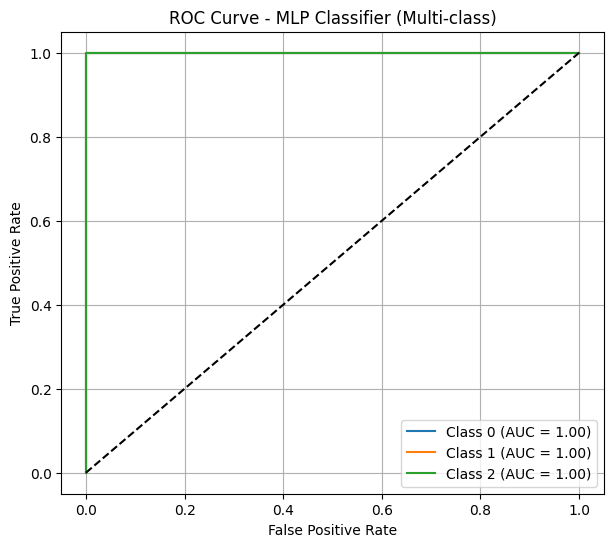

In [22]:
# Simple MLP Classifier Training and Evaluation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=10)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(" CONFUSION MATRIX ".center(80, "="))
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MLP Classifier')
plt.show()
print("=" * 80)

print(" CLASSIFICATION REPORT ".center(80, "="))
print(classification_report(y_test, y_pred))
print("=" * 80)

print(" ACCURACY SCORE ".center(80, "="))
print(f"{accuracy_score(y_test, y_pred)}")
print("=" * 80)

plot_roc_curve(mlp, X_train, X_test, y_train, y_test, clf_name="MLP Classifier")


#### as already the accuracy is 1 so finetuning is not required

In [23]:
print(X_train.shape)

(151, 13)


# PCA

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [25]:
captured_info = [var*100 for var in pca.explained_variance_ratio_]

In [26]:
pca_names = [f"PCA-{i}" for i in range(0,len(captured_info))]
print(pca_names)

['PCA-0', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4', 'PCA-5', 'PCA-6', 'PCA-7', 'PCA-8', 'PCA-9', 'PCA-10', 'PCA-11', 'PCA-12']


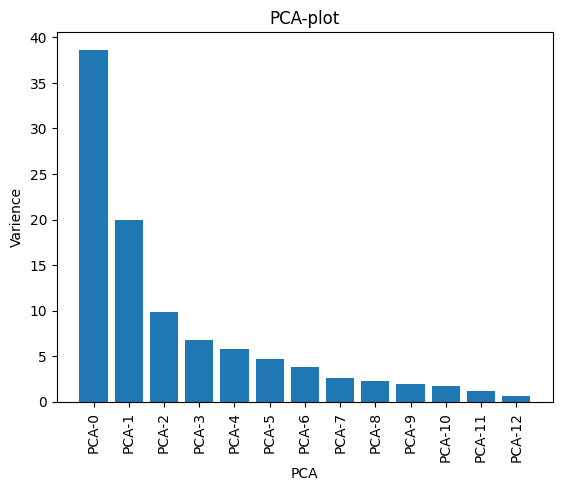

In [27]:
plt.bar(pca_names, captured_info)
plt.title('PCA-plot')
plt.xlabel('PCA')
plt.ylabel('Varience')

plt.xticks(rotation=90)

plt.show()


In [28]:
sum = 0
for i in range(8):
    sum+=captured_info[i]

print(sum)

92.22730156628823


## SVM

In [29]:
def svm_train_pca(X_train_pca, X_test_pca, y_train, y_test):
    models = ["linear", "poly", "rbf", "sigmoid"]

    for model_name in models: # Renamed 'model' to 'model_name' to avoid confusion with the module
        print(f"\n{'=' * 20} Model: {model_name.upper()} {'=' * 20}\n")

        svc = SVC(random_state=10, kernel=model_name)
        svc.fit(X_train_pca, y_train)

        y_pred = svc.predict(X_test_pca)

        
        print(" CLASSIFICATION REPORT ".center(80, "="))
        print(classification_report(y_test, y_pred))
        print("=" * 80)

        
        print(" ACCURACY SCORE ".center(80, "="))
        print(f"{accuracy_score(y_test, y_pred)}")
        print("=" * 80)

In [30]:
for i in range(1,9):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f"for {i} principal components:")
    svm_train_pca(X_train_pca, X_test_pca, y_train, y_test)

for 1 principal components:

==================== Model: LINEAR ====================

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         6
           2       1.00      0.80      0.89         5

    accuracy                           0.88        17
   macro avg       0.92      0.88      0.89        17
weighted avg       0.91      0.88      0.88        17

================================ ACCURACY SCORE ================================
0.8823529411764706

==================== Model: POLY ====================

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         6
           2       1.00      0.80      0.89         

#### from this we get that at 5 principal component we get the same result as 13 features 

## Random Forest

In [31]:
def random_forest_train_pca(X_train_pca, X_test_pca, y_train, y_test):
    print(f"\n{'=' * 20} Random Forest {'=' * 20}\n")
    rf = RandomForestClassifier(n_estimators=100, random_state=10)
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_test_pca)

    print(" CLASSIFICATION REPORT ".center(80, "="))
    print(classification_report(y_test, y_pred))
    print("=" * 80)

    print(" ACCURACY SCORE ".center(80, "="))
    print(f"{accuracy_score(y_test, y_pred)}")
    print("=" * 80)

In [32]:
for i in range(1,9):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f"for {i} principal components:")
    random_forest_train_pca(X_train_pca, X_test_pca, y_train, y_test)

for 1 principal components:

==================== Random Forest ====================

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.57      0.67      0.62         6
           2       0.80      0.80      0.80         5

    accuracy                           0.71        17
   macro avg       0.72      0.71      0.71        17
weighted avg       0.72      0.71      0.71        17

================================ ACCURACY SCORE ================================
0.7058823529411765
for 2 principal components:

==================== Random Forest ====================

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.0

#### from the result  we get that at 3 principal components we get the same result as 13 features 

In [33]:
def mlp_train_pca(X_train_pca, X_test_pca, y_train, y_test):
    print(f"\n{'=' * 20} MLP Classifier {'=' * 20}\n")
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=10)
    mlp.fit(X_train_pca, y_train)
    y_pred = mlp.predict(X_test_pca)

    print(" CLASSIFICATION REPORT ".center(80, "="))
    print(classification_report(y_test, y_pred))
    print("=" * 80)

    print(" ACCURACY SCORE ".center(80, "="))
    print(f"{accuracy_score(y_test, y_pred)}")
    print("=" * 80)

In [34]:
for i in range(1,9):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f"for {i} principal components:")
    mlp_train_pca(X_train_pca, X_test_pca, y_train, y_test)

for 1 principal components:

==================== MLP Classifier ====================

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         6
           2       1.00      0.80      0.89         5

    accuracy                           0.88        17
   macro avg       0.92      0.88      0.89        17
weighted avg       0.91      0.88      0.88        17

================================ ACCURACY SCORE ================================
0.8823529411764706
for 2 principal components:

==================== MLP Classifier ====================

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1

#### from the result we get that at 3 principal components we get the same result as 13 features 